In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
df_1= pd.read_csv('dataset_1.csv',parse_dates=[0])
print(f"Shape: {df_1.shape}\n\ndtypes:\n{df_1.dtypes}\n")
df_1.head()

Shape: (252, 4)

dtypes:
Date       datetime64[ns]
Country            object
Product            object
Intake              int64
dtype: object



,Date,Country,Product,Intake
0,2019-01-31,US,A,110
1,2019-02-28,US,A,86
2,2019-03-31,US,A,92
3,2019-04-30,US,A,113
4,2019-05-31,US,A,124


In [4]:
df_1.shape,df_1.dtypes

((252, 4),
 Date       datetime64[ns]
 Country            object
 Product            object
 Intake              int64
 dtype: object)

In [5]:
df_2 = pd.read_csv('dataset_2.csv',parse_dates=[0,1])
print(f"Shape: {df_2.shape}\n\ndtypes:\n{df_2.dtypes}\n")
df_2.head()

Shape: (3654, 5)

dtypes:
Date             datetime64[ns]
Intake Month     datetime64[ns]
Country                  object
Product                  object
Net Customers             int64
dtype: object



,Date,Intake Month,Country,Product,Net Customers
0,2019-01-31,2019-01-31,US,A,110
1,2019-02-28,2019-01-31,US,A,88
2,2019-03-31,2019-01-31,US,A,83
3,2019-04-30,2019-01-31,US,A,77
4,2019-05-31,2019-01-31,US,A,75


In [6]:
# df_3[~df_3.Intake.isnull()]

In [7]:
# df_2['Date'] = pd.to_datetime(df_2['Date'])
# df_2['Intake Month'] = pd.to_datetime(df_2['Intake Month'])
# df_2 = df_2.sort_values(by=['Product','Country','Date','Intake Month']).reset_index(drop=True)
# df_2

In [8]:
df_2[df_2['Date']==df_2['Intake Month']]

,Date,Intake Month,Country,Product,Net Customers
0,2019-01-31,2019-01-31,US,A,110
28,2019-02-28,2019-02-28,US,A,86
55,2019-03-31,2019-03-31,US,A,92
81,2019-04-30,2019-04-30,US,A,113
106,2019-05-31,2019-05-31,US,A,124
...,...,...,...,...,...
3639,2020-12-31,2020-12-31,GB,C,58
3644,2021-01-31,2021-01-31,GB,C,59
3648,2021-02-28,2021-02-28,GB,C,60
3651,2021-03-31,2021-03-31,GB,C,61


In [9]:
# df_3 = df_2[df_2['Date']==df_2['Intake Month']].merge(df_1,how='left',on=['Date','Country','Product',])
# df_3[df_3['Net Customers']!=df_3['Intake']]

In [10]:
#df_2['months_since_acquisition'] = ((df_2['Date'] - df_2['Intake Month'])/np.timedelta64(1, 'M')).map(lambda x : np.round(x)).astype('int') #doesn't work because of rounding issues

def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month

# Get the integers for the date parts from the 'InvoiceMonth' column

date_year, date_month = get_date_int(df_2, 'Date')

# Get the integers for date parts from the 'Cohortmonth' column

cohort_year, cohort_month = get_date_int(df_2, 'Intake Month')

# Calculate difference in years
years_diff = date_year - cohort_year

# Calculate difference in months
months_diff = date_month - cohort_month

# Extract the difference in months from all previous values

df_2['months_since_acquisition'] = years_diff * 12 + months_diff
df_2.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition
0,2019-01-31,2019-01-31,US,A,110,0
1,2019-02-28,2019-01-31,US,A,88,1
2,2019-03-31,2019-01-31,US,A,83,2
3,2019-04-30,2019-01-31,US,A,77,3
4,2019-05-31,2019-01-31,US,A,75,4


In [11]:
df_2[(df_2['Intake Month']=='2019-01-31')&(df_2.Product=='A')&(df_2.Country=='CA')]

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition
1218,2019-01-31,2019-01-31,CA,A,17,0
1219,2019-02-28,2019-01-31,CA,A,13,1
1220,2019-03-31,2019-01-31,CA,A,12,2
1221,2019-04-30,2019-01-31,CA,A,12,3
1222,2019-05-31,2019-01-31,CA,A,11,4
1223,2019-06-30,2019-01-31,CA,A,11,5
1224,2019-07-31,2019-01-31,CA,A,11,6
1225,2019-08-31,2019-01-31,CA,A,11,7
1226,2019-09-30,2019-01-31,CA,A,10,8
1227,2019-10-31,2019-01-31,CA,A,10,9


In [12]:
# df_2['int_months']=df_2['months_since_acquisition'].astype('int')
# df_2[(df_2['Intake Month']=='2019-01-31')&(df_2.Product=='A')&(df_2.Country=='CA')]

In [13]:
# # df_2['months_since_acquisition'] = ((df_2['Date'] - df_2['Intake Month'])/np.timedelta64(1, 'M')).map(lambda x : np.round(x)).astype('int')
# df_2['months_since_acquisition'] = ((df_2['Date'] - df_2['Intake Month'])/np.timedelta64(1, 'M'))

# df_2.head(10)

In [14]:
df_2['churn_customers'] = df_2.groupby(['Country','Product','Intake Month'])['Net Customers'].diff().abs().fillna(0)
df_2.head(10)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers
0,2019-01-31,2019-01-31,US,A,110,0,0.0
1,2019-02-28,2019-01-31,US,A,88,1,22.0
2,2019-03-31,2019-01-31,US,A,83,2,5.0
3,2019-04-30,2019-01-31,US,A,77,3,6.0
4,2019-05-31,2019-01-31,US,A,75,4,2.0
5,2019-06-30,2019-01-31,US,A,72,5,3.0
6,2019-07-31,2019-01-31,US,A,71,6,1.0
7,2019-08-31,2019-01-31,US,A,70,7,1.0
8,2019-09-30,2019-01-31,US,A,69,8,1.0
9,2019-10-31,2019-01-31,US,A,69,9,0.0


In [15]:
df_2['Date_month'] = df_2['Date'].dt.month
df_2['Date_year'] = df_2['Date'].dt.year
df_2['Cohort_month'] = df_2['Intake Month'].dt.month
df_2['Cohort_year'] = df_2['Intake Month'].dt.year
df_2

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
3649,2021-03-31,2021-02-28,GB,C,47,1,13.0,3,2021,2,2021
3650,2021-04-30,2021-02-28,GB,C,44,2,3.0,4,2021,2,2021
3651,2021-03-31,2021-03-31,GB,C,61,0,0.0,3,2021,3,2021
3652,2021-04-30,2021-03-31,GB,C,44,1,17.0,4,2021,3,2021


In [16]:
#get cohort size
df = df_2.merge(df_1,how='left',left_on=['Intake Month','Country','Product'],right_on=['Date','Country','Product'])
df = df.drop(["Date_y"],axis=1).rename(columns={'Date_x':"Date","Intake":"Cohort_size"})
df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110


In [17]:
df['Cohort_name'] = df['Intake Month'].dt.strftime('%b-%y')
df['retention_rate'] = 100 * df['Net Customers'] / df['Cohort_size']
df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110,Jan-19,100.000000
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110,Jan-19,80.000000
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110,Jan-19,75.454545
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110,Jan-19,70.000000
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110,Jan-19,68.181818


In [18]:
# df[mask].loc[df['Intake Month']=='2019-01-31']

In [19]:
df[(df.Country=='CA')&(df.Product=='B')].sort_values(by='months_since_acquisition',ascending=False)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
1651,2021-04-30,2019-01-31,CA,B,0,27,0.0,4,2021,1,2019,0,Jan-19,NaN
1650,2021-03-31,2019-01-31,CA,B,0,26,0.0,3,2021,1,2019,0,Jan-19,NaN
1678,2021-04-30,2019-02-28,CA,B,0,26,0.0,4,2021,2,2019,0,Feb-19,NaN
1649,2021-02-28,2019-01-31,CA,B,0,25,0.0,2,2021,1,2019,0,Jan-19,NaN
1677,2021-03-31,2019-02-28,CA,B,0,25,0.0,3,2021,2,2019,0,Feb-19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,2020-05-31,2020-05-31,CA,B,32,0,0.0,5,2020,5,2020,32,May-20,100.0
1964,2020-06-30,2020-06-30,CA,B,48,0,0.0,6,2020,6,2020,48,Jun-20,100.0
1975,2020-07-31,2020-07-31,CA,B,0,0,0.0,7,2020,7,2020,0,Jul-20,NaN
1985,2020-08-31,2020-08-31,CA,B,0,0,0.0,8,2020,8,2020,0,Aug-20,NaN


### Monthly cohorts by Country/Product

In [ ]:

# sns.heatmap(cohort_size,
#                 annot=True, 
#                 cbar=False, 
#                 fmt='g', 
#                 cmap=white_cmap)

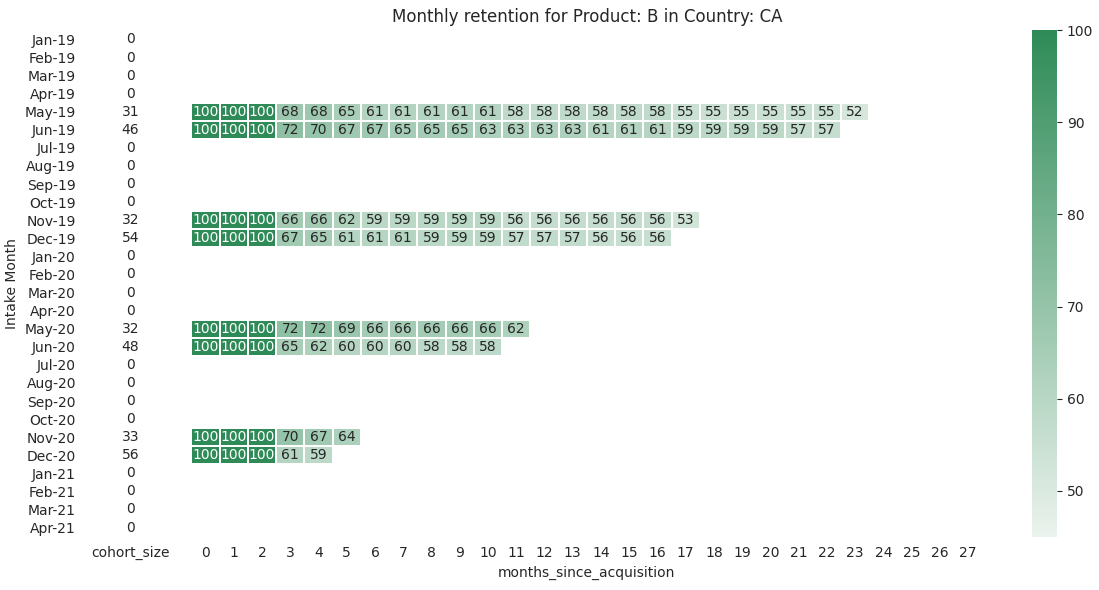

In [21]:
PRODUCT = 'B'
COUNTRY = 'CA'
TITLE=f"Monthly retention for Product: {PRODUCT} in Country: {COUNTRY}"

mask = (df.Country==COUNTRY)&(df.Product==PRODUCT)
# tmp2 = tmp2[tmp2.Country==COUNTRY].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')

tmp = df.loc[mask].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
cohort_size = pd.DataFrame(df[mask].pivot(index='Intake Month', columns='months_since_acquisition', values='Cohort_size').iloc[:,0].astype(int)).rename(columns={0: 'cohort_size'})

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    seagreen_color = sns.light_palette("seagreen", as_cmap=True)

    sns.heatmap(data=tmp,
    annot = True,
    # cmap = 'Blues',
    cmap= seagreen_color,
    vmin = 45, #the min of the dataset
    vmax = 100.0,
    fmt = '.0f',
    linewidth = 0.3,
    yticklabels='',
    ax=ax[1])
    # sns.light_palette("seagreen", as_cmap=True)
    ax[1].set_title(TITLE, fontsize=12)
    ax[1].set(ylabel='')

    # cohort size
    white_cmap = mcolors.ListedColormap(['white'])

    sns.heatmap(cohort_size, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap,
                yticklabels=tmp.index.strftime('%b-%y').to_list(),
                ax=ax[0])

    fig.tight_layout()

### Monthly cohorts by Country

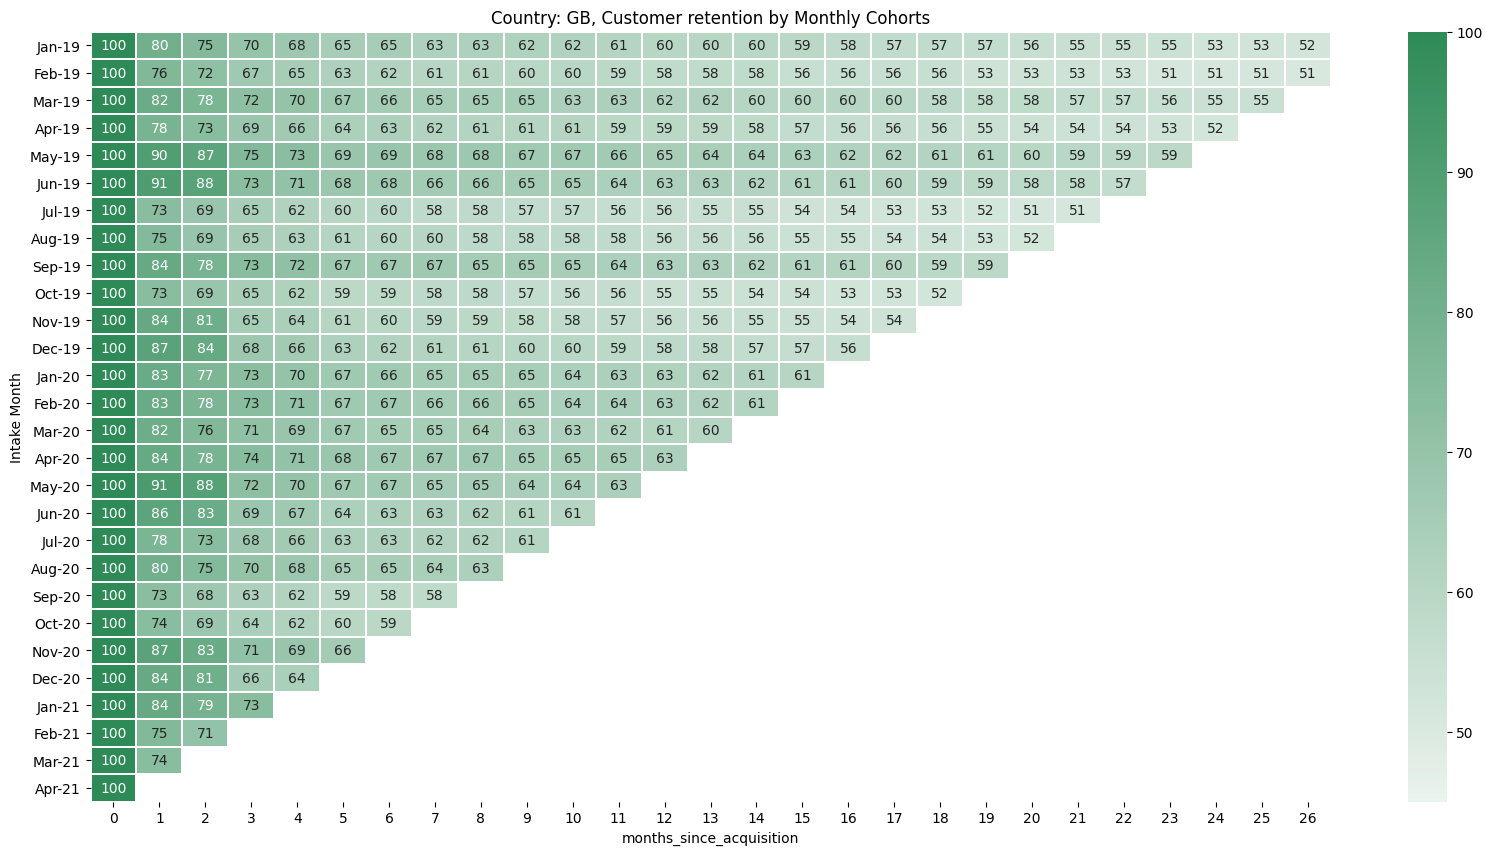

In [24]:
COUNTRY = 'GB'

tmp2 = df.groupby(['Country','Intake Month','months_since_acquisition'])['retention_rate'].mean().reset_index()

tmp2 = tmp2[tmp2.Country==COUNTRY].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
# Initialize inches palot figure
plt.figure(figsize=(20,10))

# Add a title
plt.title(f'Country: {COUNTRY}, Customer retention by Monthly Cohorts')

# Create the heatmap
seagreen_color = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(data=tmp2,
annot = True,
# cmap = 'Blues',
cmap= seagreen_color,
vmin = 45, #the min of the dataset
vmax = 100.0,
fmt = '.0f',
linewidth = 0.3,
yticklabels=tmp2.index.strftime('%b-%y').to_list())
# sns.light_palette("seagreen", as_cmap=True)
plt.show();

## Monthly cohorts by Product

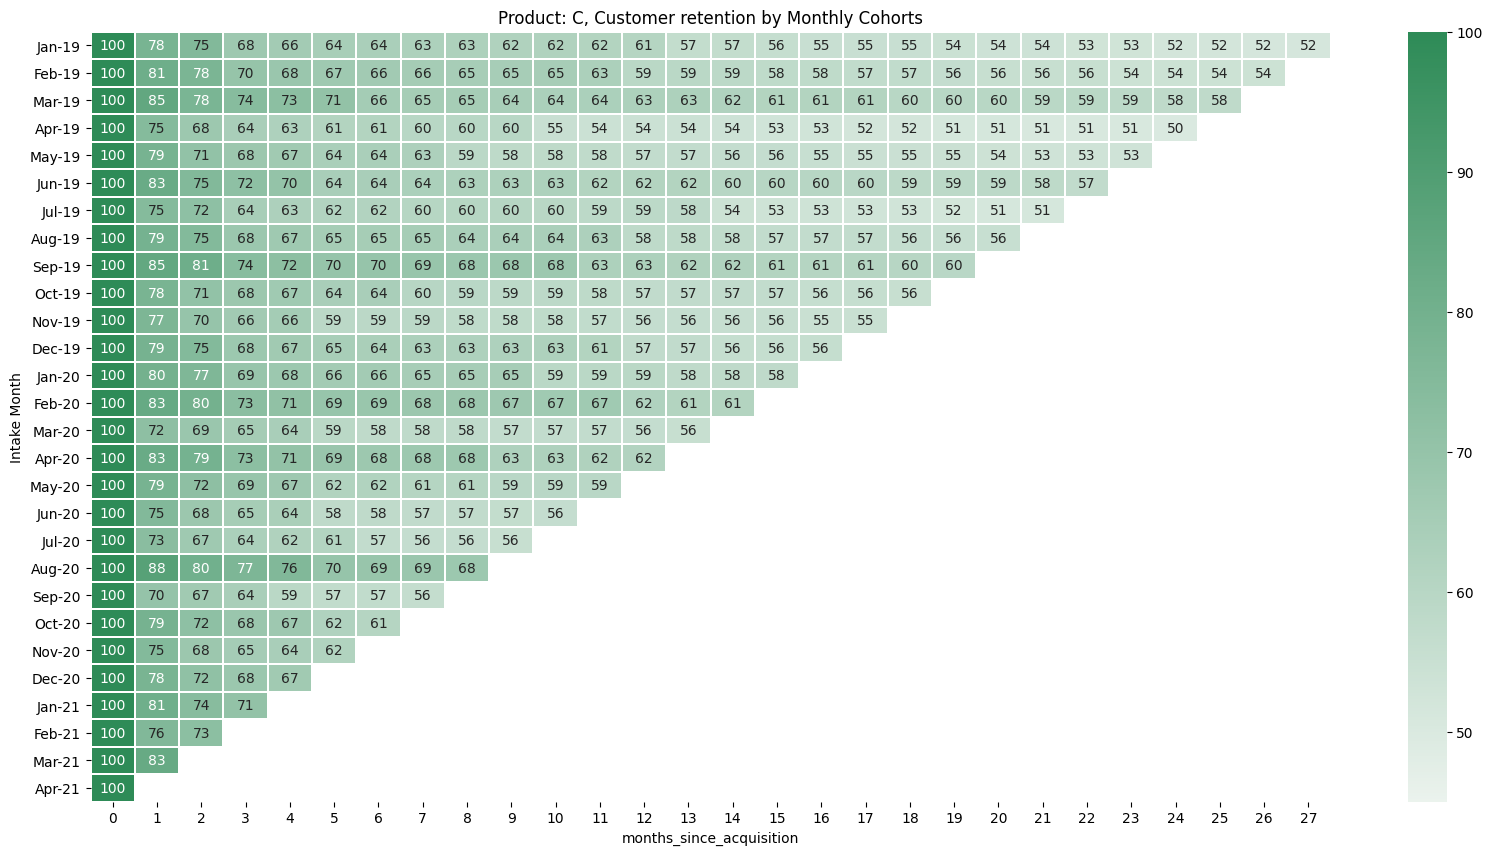

In [181]:
PRODUCT = 'C'

tmp3 = df.groupby(['Product','Intake Month','months_since_acquisition'])['retention_rate'].mean().reset_index()

tmp3 = tmp3[tmp3.Product==PRODUCT].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
# Initialize inches palot figure
plt.figure(figsize=(20,10))

# Add a title
plt.title(f'Product: {PRODUCT}, Customer retention by Monthly Cohorts')

# Create the heatmap
seagreen_color = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(data=tmp3,
annot = True,
# cmap = 'Blues',
cmap= seagreen_color,
vmin = 45, #the min of the dataset
vmax = 100.0,
fmt = '.0f',
linewidth = 0.3,
yticklabels=tmp3.index.strftime('%b-%y').to_list())
# sns.light_palette("seagreen", as_cmap=True)
plt.show();

## Modelling

In [72]:
PRODUCT = 'C'
COUNTRY = 'US'

mask = (df['Product']==PRODUCT) & (df['Country']==COUNTRY) #(df_2['Intake Month']==INTAKE_MONTH) & 

mini_df = df.loc[mask,:]
mini_df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
812,2019-01-31,2019-01-31,US,C,50,0,0.0,1,2019,1,2019,50,Jan-19,100.000000
813,2019-02-28,2019-01-31,US,C,40,1,10.0,2,2019,1,2019,50,Jan-19,80.000000
814,2019-02-28,2019-02-28,US,C,51,0,0.0,2,2019,2,2019,51,Feb-19,100.000000
815,2019-03-31,2019-01-31,US,C,38,2,2.0,3,2019,1,2019,50,Jan-19,76.000000
816,2019-03-31,2019-02-28,US,C,45,1,6.0,3,2019,2,2019,51,Feb-19,88.235294


In [24]:
date_train_test_split = '2020-12-31'

train_df = mini_df[mini_df.Date<=date_train_test_split]
train_df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
1624,2019-01-31,2019-01-31,CA,B,0,0,0.0,1,2019,1,2019,0,Jan-19,NaN
1625,2019-02-28,2019-01-31,CA,B,0,1,0.0,2,2019,1,2019,0,Jan-19,NaN
1626,2019-03-31,2019-01-31,CA,B,0,2,0.0,3,2019,1,2019,0,Jan-19,NaN
1627,2019-04-30,2019-01-31,CA,B,0,3,0.0,4,2019,1,2019,0,Jan-19,NaN
1628,2019-05-31,2019-01-31,CA,B,0,4,0.0,5,2019,1,2019,0,Jan-19,NaN


In [249]:
mini_df.head(3)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Cohort_month,Cohort_year,Date_month,Date_year,Cohort_size,Cohort_name,retention_rate
1624,2019-01-31,2019-01-31,CA,B,0,0,0.0,1,2019,1,2019,0,Jan-19,NaN
1625,2019-02-28,2019-01-31,CA,B,0,1,0.0,1,2019,2,2019,0,Jan-19,NaN
1626,2019-03-31,2019-01-31,CA,B,0,2,0.0,1,2019,3,2019,0,Jan-19,NaN


### Net customers dependency with time

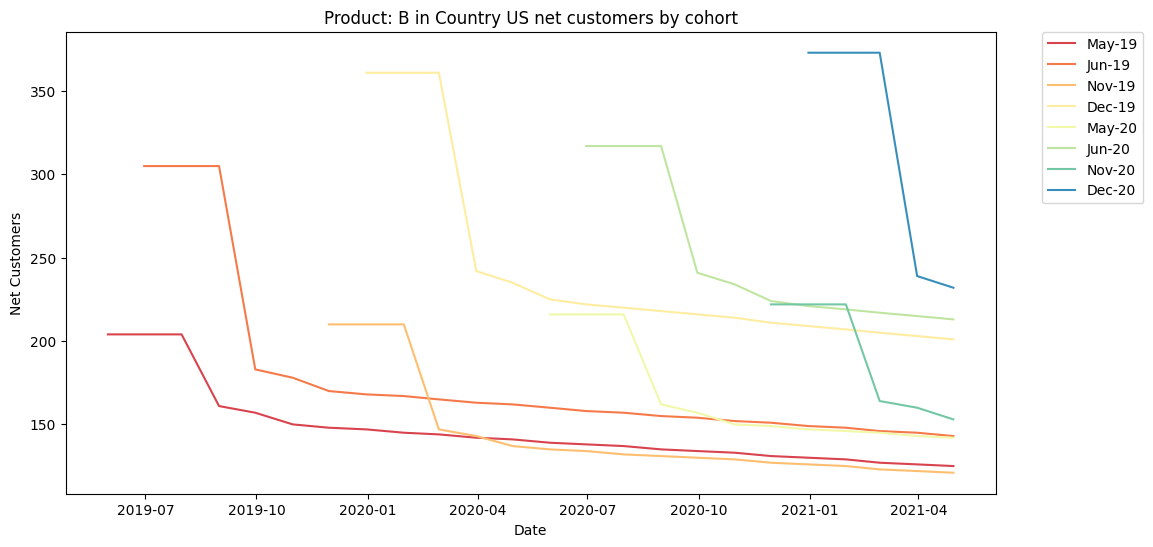

In [203]:
TITLE = f"Product: {PRODUCT} in Country {COUNTRY} net customers by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='Net Customers',palette='Spectral')
g.set_title(TITLE)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### Dependency of retention rate with recency (absolute age cohort)

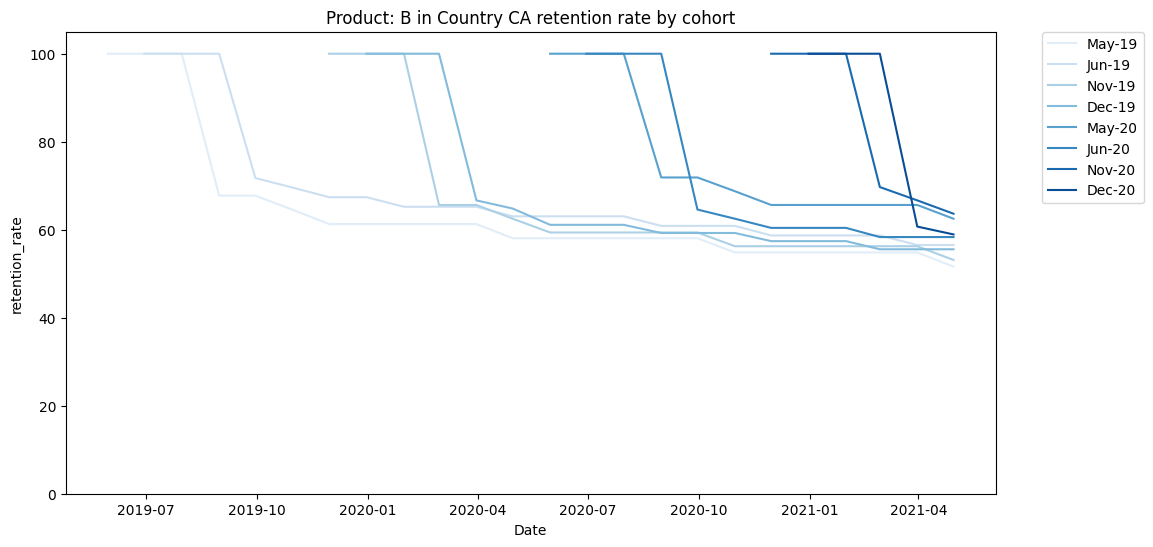

In [250]:
TITLE = f"Product: {PRODUCT} in Country {COUNTRY} retention rate by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Blues')
g.set_title(TITLE)
g.set(ylim=(0,105))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [225]:
mini_df

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Cohort_month,Cohort_year,Date_month,Date_year,Cohort_size,Cohort_name,retention_rate
406,2019-01-31,2019-01-31,US,B,0,0,0.0,1,2019,1,2019,0,Jan-19,NaN
407,2019-02-28,2019-01-31,US,B,0,1,0.0,1,2019,2,2019,0,Jan-19,NaN
408,2019-02-28,2019-02-28,US,B,0,0,0.0,2,2019,2,2019,0,Feb-19,NaN
409,2019-03-31,2019-01-31,US,B,0,2,0.0,1,2019,3,2019,0,Jan-19,NaN
410,2019-03-31,2019-02-28,US,B,0,1,0.0,2,2019,3,2019,0,Feb-19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,2021-04-30,2020-12-31,US,B,232,4,7.0,12,2020,4,2021,373,Dec-20,62.198391
808,2021-04-30,2021-01-31,US,B,0,3,0.0,1,2021,4,2021,0,Jan-21,NaN
809,2021-04-30,2021-02-28,US,B,0,2,0.0,2,2021,4,2021,0,Feb-21,NaN
810,2021-04-30,2021-03-31,US,B,0,1,0.0,3,2021,4,2021,0,Mar-21,NaN


In [230]:
# !pip install lifelines
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import ExponentialFitter
from lifelines.utils import survival_events_from_table

T, E, W = survival_events_from_table(mini_df.set_index('months_since_acquisition'), observed_deaths_col='churn_customers', censored_col='Net Customers')
# weights, W, is the number of occurrences of each observation - helps with data compression.

# kmf = KaplanMeierFitter().fit(T, E, weights=W)
exf = ExponentialFitter().fit(T+0.0001, E, weights=W)


In [240]:
T

array([ 0,  1,  0,  2,  1,  3,  3,  2,  4,  4,  3,  3,  5,  5,  4,  4,  6,
        6,  5,  5,  0,  7,  7,  6,  6,  1,  0,  8,  8,  7,  7,  2,  1,  9,
        9,  8,  8,  3,  3,  2, 10, 10,  9,  9,  4,  4,  3,  3, 11, 11, 10,
       10,  5,  5,  4,  4, 12, 12, 11, 11,  6,  6,  5,  5,  0, 13, 13, 12,
       12,  7,  7,  6,  6,  1,  0, 14, 14, 13, 13,  8,  8,  7,  7,  2,  1,
       15, 15, 14, 14,  9,  9,  8,  8,  3,  3,  2, 16, 16, 15, 15, 10, 10,
        9,  9,  4,  4,  3,  3, 17, 17, 16, 16, 11, 11, 10, 10,  5,  5,  4,
        4, 18, 18, 17, 17, 12, 12, 11, 11,  6,  6,  5,  5,  0, 19, 19, 18,
       18, 13, 13, 12, 12,  7,  7,  6,  6,  1,  0, 20, 20, 19, 19, 14, 14,
       13, 13,  8,  8,  7,  7,  2,  1, 21, 21, 20, 20, 15, 15, 14, 14,  9,
        9,  8,  8,  3,  3,  2, 22, 22, 21, 21, 16, 16, 15, 15, 10, 10,  9,
        9,  4,  4,  3,  3, 23, 23, 22, 22, 17, 17, 16, 16, 11, 11, 10, 10,
        5,  5,  4,  4])

In [182]:
mini_df.head(3)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Cohort_month,Cohort_year,Date_month,Date_year,Cohort_size,Cohort_name,retention_rate
1624,2019-01-31,2019-01-31,CA,B,0,0,0.0,1,2019,1,2019,0,Jan-19,NaN
1625,2019-02-28,2019-01-31,CA,B,0,1,0.0,1,2019,2,2019,0,Jan-19,NaN
1626,2019-03-31,2019-01-31,CA,B,0,2,0.0,1,2019,3,2019,0,Jan-19,NaN


In [195]:
# TITLE = f"Product: {PRODUCT} in Country {COUNTRY} retention rate by cohort"
# plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
# g.set_title(TITLE)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### Dependency with months since acquisition

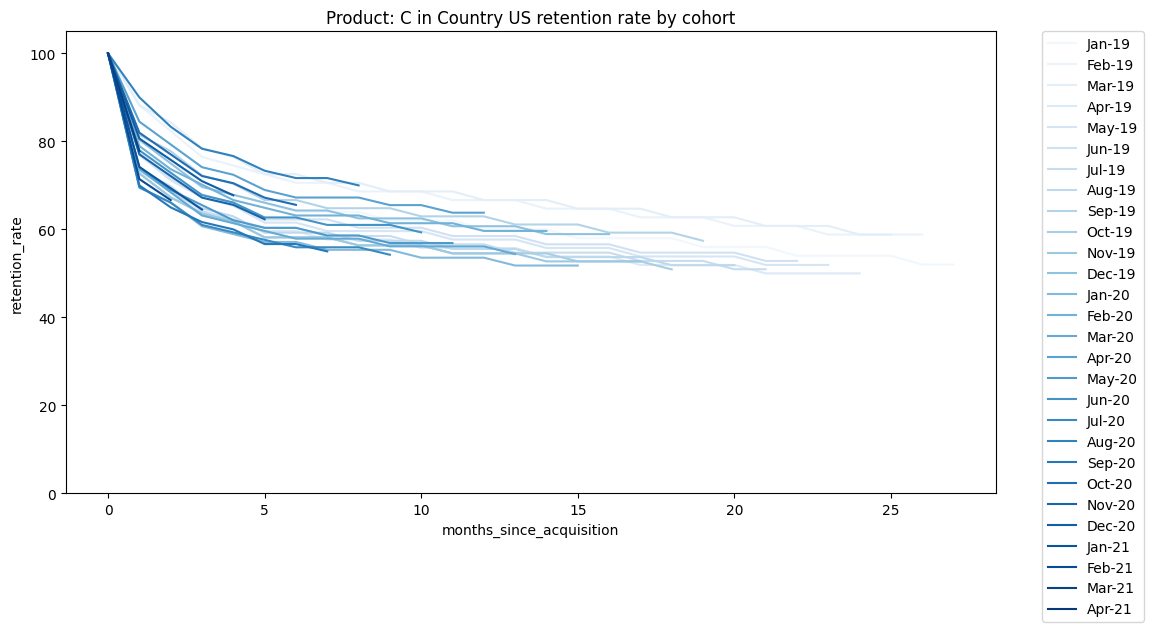

In [73]:
TITLE = f"Product: {PRODUCT} in Country {COUNTRY} retention rate by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='months_since_acquisition',y='retention_rate',palette='Blues')
g.set_title(TITLE)
g.set(ylim=(0, 105))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

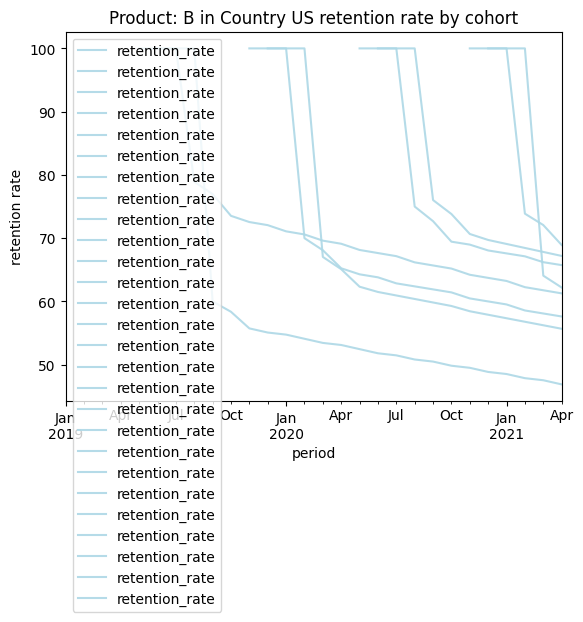

In [112]:
for cohort in mini_df["Intake Month"].unique()[:-1]:
    ax = mini_df[mini_df['Intake Month']==cohort].set_index("Date")[
        "retention_rate"
    ].plot(color='lightblue',alpha=0.9)

ax.set(
    title=f"Product: {PRODUCT} in Country {COUNTRY} retention rate by cohort",
    xlabel="period",
    ylabel="retention rate"
);

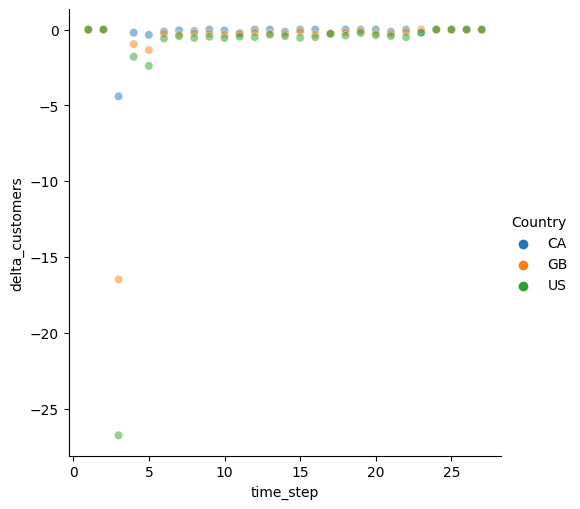

In [32]:
# df_2[df_2['delta_customers']0

tmp = df_2[df_2.Product=='B'].groupby(['Country','time_step'])['delta_customers'].mean().reset_index()
tmp.head()
sns.relplot(data=tmp,x='time_step',hue='Country',y='delta_customers',alpha=0.5)

In [22]:
tmp[tmp.time_step==3]

,Country,time_step,delta_customers
3,CA,3,-4.40
31,GB,3,-16.48
59,US,3,-26.76


In [19]:
df_2.to_csv('df_2_enriched.csv',index=False)